In [5]:
import numpy as np
import scipy.linalg as sl

A = np.array([
                [10., 2., 1.],
                [6., 5., 4.],
                [1., 4., 7.]
])
print('A',A)
print('scipy norm',sl.norm(A,'fro'))
print('maximum absolute row-sum',sl.norm(A,np.inf))
print('maximum absolute column-sum', sl.norm(A,1))
print('scipy spectral norm', sl.norm(A,2))
print('spectral norm by hand', np.sqrt(np.real(np.max((sl.eigvals(A.T @ A))))))



A [[10.  2.  1.]
 [ 6.  5.  4.]
 [ 1.  4.  7.]]
scipy norm 15.748015748023622
maximum absolute row-sum 15.0
maximum absolute column-sum 17.0
scipy spectral norm 13.793091098640064
spectral norm by hand 13.793091098640062


In [7]:
def frob(A):
    m,n = A.shape
    squsum = 0.0
    for i in range(n):
        for j in range(n):
            squsum += A[i,j]**2
    return np.sqrt(squsum)

def mars(A):
    m,n = A.shape
    maxarsum = 0.0
    for i in range(m):
        arsum = np.sum(np.abs(A[i]))
        if arsum > maxarsum:
            maxarsum = arsum 
        else:
            maxarsum = maxarsum
    return maxarsum

A = np.array([
                [10., 2., 1.],
                [6., 5., 4.],
                [1., 4., 7.]
])
print('A',A)
print(frob(A)==sl.norm(A,'fro') and mars(A) == sl.norm(A, np.inf))

A [[10.  2.  1.]
 [ 6.  5.  4.]
 [ 1.  4.  7.]]
True


In [19]:
A = np.array([[10.,2.,1.],[6.,5.,4.],[1.,4.,7.]])
print('A',A)
print('scipy cond(A)=',np.linalg.cond(A))
print('default condition number uses matrix two-norm',sl.norm(A,2)*sl.norm(sl.inv(A),2))
print('sl.norm(A,2) * sl.norm(sl.inv(A),2)=',sl.norm(A,2) * sl.norm(sl.inv(A),2))
print('scipy frobenius cond(A) =',np.linalg.cond(A,'fro'))
print("sl.norm(A,'fro') * sl.norm(sl.linalg.cond(A,'fro'))=", sl.norm(A,'fro') * sl.norm(sl.inv(A),'fro'))

A [[10.  2.  1.]
 [ 6.  5.  4.]
 [ 1.  4.  7.]]
scipy cond(A)= 10.713371881346792
default condition number uses matrix two-norm 10.713371881346786
sl.norm(A,2) * sl.norm(sl.inv(A),2)= 10.713371881346786
scipy frobenius cond(A) = 12.463616561943589
sl.norm(A,'fro') * sl.norm(sl.linalg.cond(A,'fro'))= 12.463616561943587


In [20]:
A = np.array([[2.,1.],[2.,1.]])
b = np.array([3.,0.0])

print('Matrix is singular, det(A) =',sl.det(A))
for i in range(3):
    A[1,1] += 0.001
    epsilon = A[1,1] - 1.0
    print('Epsilon =%g, det(A)=%g, conda(A)=%g.'%(epsilon,sl.det(A),np.linalg.cond(A)),
            'inv(A)*b = ', sl.inv(A)@b)

Matrix is singular, det(A) = 0.0
Epsilon =0.001, det(A)=0.002, conda(A)=5001. inv(A)*b =  [ 1501.5 -3000. ]
Epsilon =0.002, det(A)=0.004, conda(A)=2501. inv(A)*b =  [  751.5 -1500. ]
Epsilon =0.003, det(A)=0.006, conda(A)=1667.67. inv(A)*b =  [  501.5 -1000. ]


In [23]:
import matplotlib.pyplot as plt
def f1(x):
    return (1. - x)**10

def f2(x):
    return (1.0 -10.*x**2 - 120.*x**3 +
            210.*x**4 - 252.*x**5 + 210.*x**6 -
            120.*x**7 + 45.*x**8 - 10.*x**9 + x**10)

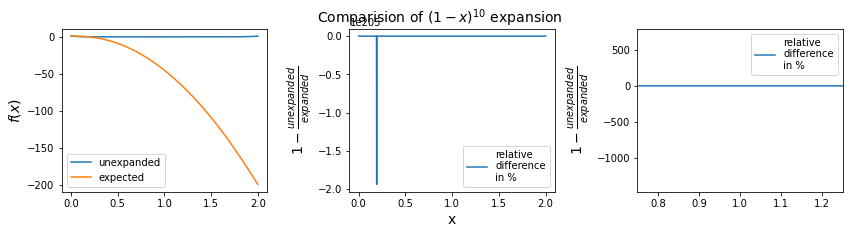

In [25]:
xi = np.linspace(0,2,1000)
fig, axes = plt.subplots(1,3,figsize=(14,3))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
 
ax1.plot(xi,f1(xi),label='unexpanded')
ax1.plot(xi,f2(xi),label='expected')
ax1.legend(loc='best')
ax1.set_ylabel('$f(x)$', fontsize=14)

ax2.plot(xi,1.-f1(xi)/f2(xi)**100, label='relative\ndifference\nin %')
ax2.legend(loc='best')
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel(r'$1-\frac{unexpanded}{expanded}$', fontsize=14)

ax3.set_xlim(0.75, 1.25)
ax3.plot(xi, 1.-f1(xi)/f2(xi)*100, label='relative\ndifference\nin %')
ax3.legend(loc='best')
ax3.set_ylabel(r'$1-\frac{unexpanded}{expanded}$', fontsize=14)

plt.suptitle('Comparision of $(1-x)^{10}$ expansion', fontsize=14)
plt.subplots_adjust(wspace=0.4)
plt.show()